# Project 9 -- Dwijen Chawra

## Question 1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/anvil/projects/tdm/data/open_food_facts/openfoodfacts.tsv", sep='\t')

<ipython-input-1-d602f215cea1>:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/anvil/projects/tdm/data/open_food_facts/openfoodfacts.tsv", sep='\t')


code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_en, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_en, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_en, ingredients_text, allergens, allergens_en, traces, traces_tags, traces_en, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_en, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_en, main_category, main_category_en, image_url, image_small_url, ene

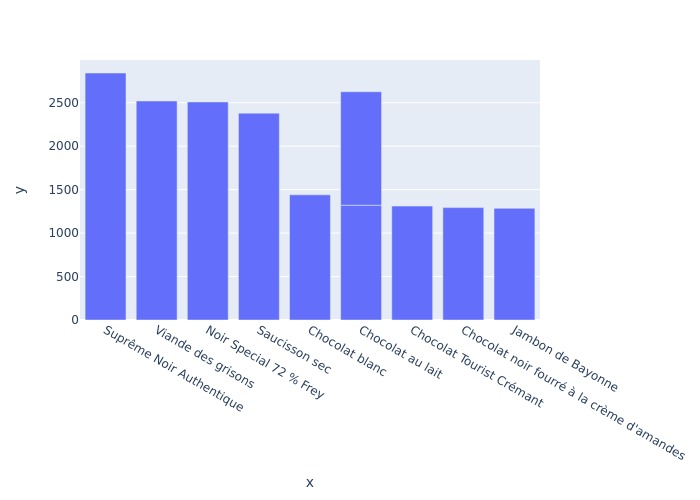

In [2]:
from pprint import pprint

for i in df.columns:
    print(i, end=", ")

import plotly.express as px

df = df.sort_values(by="carbon-footprint_100g", ascending=False)

# print(df.head(20))

fig = px.bar(x=df["product_name"][0:10], y=df["carbon-footprint_100g"][0:10])
fig.update_xaxes(tickangle=30)

fig.show(renderer="jpg")

There is a weird result, for "chocolat au lait". This is a duplicate column in the dataset and plotly has decided to plot both values on top of each other, and messing up the descending order in the graph.

## Question 2

In [3]:
restaurants = pd.read_csv("/anvil/projects/tdm/data/techcrunch/test_full.csv")


<ipython-input-3-6d34a9ceb99b>:1: DtypeWarning:

Columns (0,1,4,5,7,14,19,20,23,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,60,61,62,65,66) have mixed types. Specify dtype option on import or set low_memory=False.



The goal of this visualization is to see whether there is a correlation between the food preparation time and the rating.

In [4]:
for i in restaurants.columns:
    print(i, end=", ")

customer_id, gender, status_x, verified_x, created_at_x, updated_at_x, location_number, location_type, latitude_x, longitude_x, id, authentication_id, latitude_y, longitude_y, vendor_category_en, vendor_category_id, delivery_charge, serving_distance, is_open, OpeningTime, OpeningTime2, prepration_time, commission, is_akeed_delivering, discount_percentage, status_y, verified_y, rank, language, vendor_rating, sunday_from_time1, sunday_to_time1, sunday_from_time2, sunday_to_time2, monday_from_time1, monday_to_time1, monday_from_time2, monday_to_time2, tuesday_from_time1, tuesday_to_time1, tuesday_from_time2, tuesday_to_time2, wednesday_from_time1, wednesday_to_time1, wednesday_from_time2, wednesday_to_time2, thursday_from_time1, thursday_to_time1, thursday_from_time2, thursday_to_time2, friday_from_time1, friday_to_time1, friday_from_time2, friday_to_time2, saturday_from_time1, saturday_to_time1, saturday_from_time2, saturday_to_time2, primary_tags, open_close_flags, vendor_tag, vendor_ta

       vendor_rating  prepration_time
count   1.631700e+06     1.631700e+06
mean    4.350000e+00     1.403000e+01
std     2.475884e-01     4.295243e+00
min     3.200000e+00     5.000000e+00
25%     4.200000e+00     1.000000e+01
50%     4.400000e+00     1.500000e+01
75%     4.500000e+00     1.500000e+01
max     4.800000e+00     4.500000e+01
     vendor_rating  prepration_time
0              4.4             15.0
1              4.7             14.0
2              4.5             19.0
3              4.5             16.0
4              4.4             10.0
..             ...              ...
495            4.1             10.0
496            4.2             10.0
497            4.3             10.0
498            4.2             10.0
499            4.3             20.0

[500 rows x 2 columns]
start====================


/apps/spack/anvilgpu/apps/anaconda/2021.05-py38-gcc-8.4.1-vrzyh2x/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/apps/spack/anvilgpu/apps/anaconda/2021.05-py38-gcc-8.4.1-vrzyh2x/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



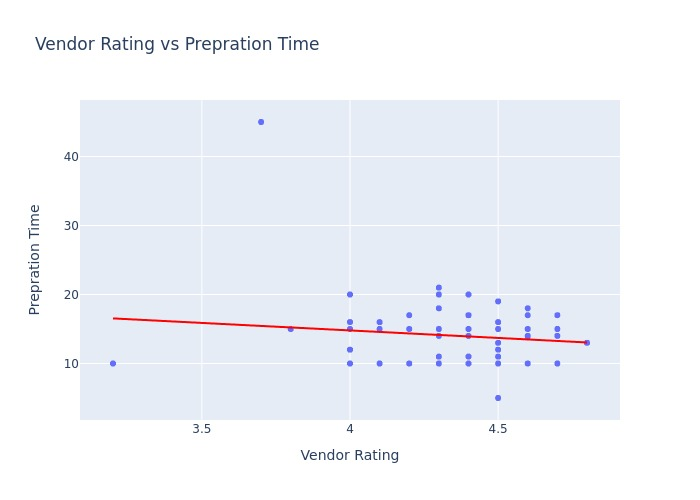

In [5]:
from tqdm import tqdm
tag_count_col = []

# make new df of prepration_time and vendor_rating
newdf = restaurants.loc[:, ["vendor_rating", "prepration_time"]]
print(newdf.describe())
print(newdf.head(500))

print("start====================")

fig = px.scatter(x=newdf["vendor_rating"], y=newdf["prepration_time"], trendline="ols", trendline_color_override="red", labels={"x": "Vendor Rating", "y": "Prepration Time"}, title="Vendor Rating vs Prepration Time")
fig.show(renderer="jpg")



This plot shows the food preparation time on the x-axis and the rating on the y-axis. There is also a trend line to show the correlation between the two variables. The trend line shows a slight negative correlation, which means that the food preparation time and the rating are inversely proportional to each other. This means that the longer the food preparation time, the lower the rating. This is a very weak correlation, and the trend line is not very accurate.

There is no visible correlation between the food preparation time and the rating.

## Question 3

id, name, brewery_id, state, country, style, availability, abv, notes, retired, 
id, name, city, state, country, notes, types, 
beer_id, username, date, text, look, smell, taste, feel, overall, score, 
            beer_id          look         smell         taste          feel  \
count  9.073128e+06  5.283110e+06  5.283110e+06  5.283110e+06  5.283110e+06   
mean   7.730655e+04  3.952155e+00  3.887863e+00  3.920704e+00  3.884350e+00   
std    7.929345e+04  5.517191e-01  6.115910e-01  6.333365e-01  5.999279e-01   
min    3.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.155400e+04  3.750000e+00  3.500000e+00  3.500000e+00  3.500000e+00   
50%    5.654500e+04  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
75%    1.076670e+05  4.250000e+00  4.250000e+00  4.250000e+00  4.250000e+00   
max    3.731280e+05  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

            overall         score  
count  5.283110e+06  9.073128e+06  
mean   3.91628

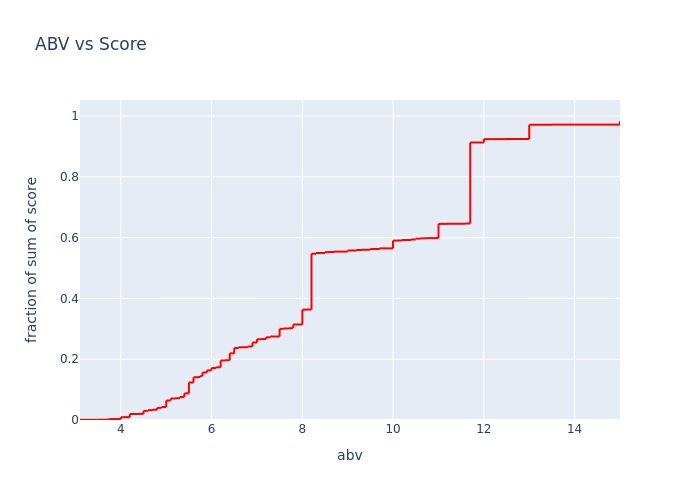

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px


# /anvil/projects/tdm/data/beer/beers.parquet  /anvil/projects/tdm/data/beer/breweries.parquet  /anvil/projects/tdm/data/beer/reviews.parquet  /anvil/projects/tdm/data/beer/reviews_sample.parquet
beersdf = pd.read_parquet("/anvil/projects/tdm/data/beer/beers.parquet")
breweriesdf = pd.read_parquet("/anvil/projects/tdm/data/beer/breweries.parquet")
reviewsdf = pd.read_parquet("/anvil/projects/tdm/data/beer/reviews.parquet")


for i in beersdf.columns:
    print(i, end=", ")
print()
for i in breweriesdf.columns:
    print(i, end=", ")
print()

for i in reviewsdf.columns:
    print(i, end=", ")
print()

print(reviewsdf.describe())

# rename the columns
breweriesdf = breweriesdf.rename(columns={"name": "brewery_name"})
beersdf = beersdf.rename(columns={"name": "beer_name"})

# add abv to reviewsdf
reviewsdf = pd.merge(reviewsdf, beersdf[["id", "abv"]], left_on="beer_id", right_on="id", how="left")
print(reviewsdf.head(10))

# fig = px.line(reviewsdf[:10000], x="abv", y=["look", "smell", "taste", "feel", "overall", "score"])
# fig = px.scatter(reviewsdf[0:10000], x="abv", y=["score"])
# fig.show(renderer="jpg")

fig = px.ecdf(reviewsdf[0:10000], x="abv", y="score", labels={"x": "ABV", "y": "Score"}, title="ABV vs Score", color_discrete_sequence=["red", "green", "blue", "yellow", "orange", "purple"])
fig.show(renderer="jpg")



The bulk of the beers have an abv of around 8.2, and another chunk have an abv around 11.8.

## Question 4

date, datetime, SACTMIN, SPOSTMIN, ride_name, 


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



61282
122568


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



183854


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



245142


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



306430


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



367715


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



429002


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



490291


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



551577


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



591837


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



632096


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



662759


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



693422


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



754710


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



782055


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



843343


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



904632


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



965920


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1027209


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1065383


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1122610


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1183899


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1230034


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1291322


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1352610


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1413897


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1456096


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1517385


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1578674


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1639913


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1701202


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1762487


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1799388


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1860677


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1921941


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1967404


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2012947


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2074236


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2120826


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2182115


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2238042


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2299331


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2360620


<ipython-input-2-d590f909c36e>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2421077
            SPOSTMIN        ride_name             datetime test date_time  \
count   1.045727e+06          1045727              1045727    0   1045727   
unique           NaN               44               193370    0     24926   
top              NaN  winnie_the_pooh  2021-11-07 15:00:01  NaN  17:01:02   
freq             NaN            35513                   38  NaN      5649   
mean    3.381680e+01              NaN                  NaN  NaN       NaN   
std     3.016800e+01              NaN                  NaN  NaN       NaN   
min     5.000000e+00              NaN                  NaN  NaN       NaN   
25%     1.000000e+01              NaN                  NaN  NaN       NaN   
50%     2.500000e+01              NaN                  NaN  NaN       NaN   
75%     4.500000e+01              NaN                  NaN  NaN       NaN   
max     3.600000e+02              NaN                  NaN  NaN       NaN   

                hour  
count   1.045727e+06  
unique           NaN 

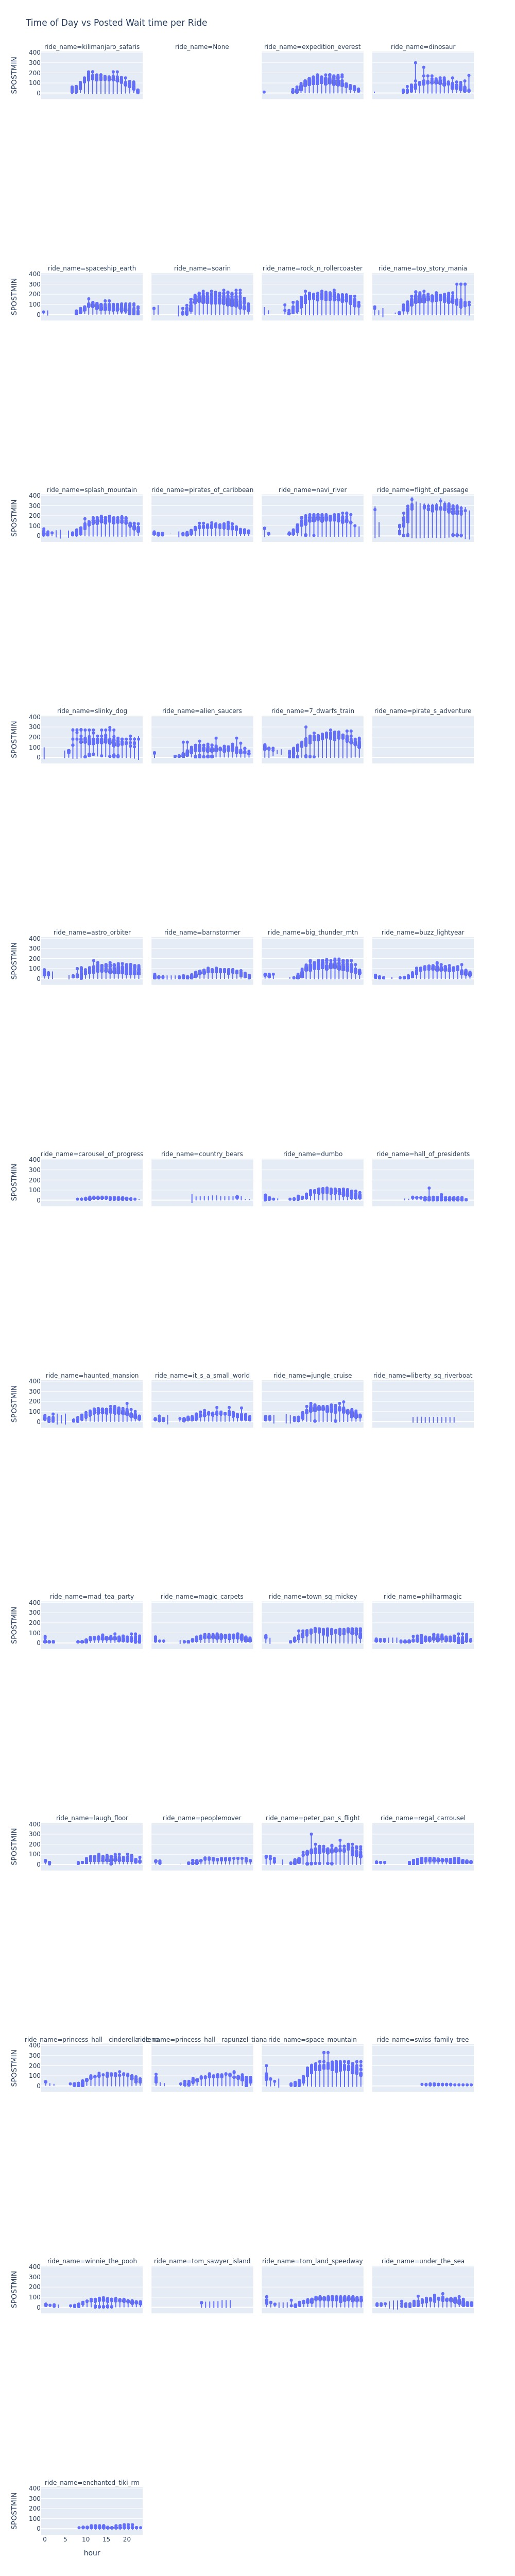

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from time import sleep

# /anvil/projects/tdm/data/disney/total.parquet

disneydf = pd.read_parquet("/anvil/projects/tdm/data/disney/total.parquet")

for i in disneydf.columns:
    print(i, end=", ")
print()

# print(disneydf.head(10))
# print(disneydf.describe())
# print(len(disneydf))

# print(disneydf.describe(include="all"))

disneydf["date_time"] = pd.to_datetime(disneydf["datetime"]).dt.time

disneydf = disneydf.loc[disneydf["SPOSTMIN"] > 0]

disneydf.dropna(subset=['SPOSTMIN'], inplace=True)

#crazy time
testingdf = pd.DataFrame(columns=["date_time", "SPOSTMIN", "ride_name", "datetime", "test"])
for ridename in disneydf["ride_name"].unique():
    temp = disneydf.loc[disneydf["ride_name"] == ridename]
    temp.loc[:, "test"] = pd.to_datetime(temp["datetime"])
    temp = temp.groupby(pd.Grouper(key='test', freq='1h')).first()
    testingdf = pd.concat([testingdf, temp], axis=0)

    print(len(testingdf))

finaldf = testingdf.loc[:, ["SPOSTMIN", "ride_name", "datetime", "test"]]
finaldf["date_time"] = pd.to_datetime(finaldf["datetime"]).dt.time
finaldf["hour"] = pd.to_datetime(finaldf["datetime"]).dt.hour

finaldf = finaldf.sort_values(by="test", ascending=True)

print(finaldf.describe(include="all"))
print(finaldf.dtypes)
# plot a violin plot of the time of day and SPOSTMIN
fig = px.violin(data_frame=finaldf, x="hour", y="SPOSTMIN", facet_col="ride_name", facet_col_wrap=4, title="Time of Day vs Posted Wait time per Ride", labels={"x": "Time of Day", "y": "Posted Wait Time"}, height=5000, width=1000)
# fig.update_xaxes(dtick="300000.0", tick0="00:00:00.000000", tickformat="%H:%M")
print("finished plotting and displaying now")
fig.show(renderer="jpg")
# fig.show()

After many many many many hours of wrangling plotly, I got this nice chart. Shows how the wait times increase in the evenings as more people come to the park.

## Question 5

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px

# /anvil/projects/tdm/data/stackoverflow/unprocessed/2021.csv

stackdf = pd.read_csv("/anvil/projects/tdm/data/stackoverflow/unprocessed/2021.csv")

for i in stackdf.columns:
    print(i, end=", ")
print()

print(stackdf.head(10))
print(stackdf.describe())

ResponseId, MainBranch, Employment, Country, US_State, UK_Country, EdLevel, Age1stCode, LearnCode, YearsCode, YearsCodePro, DevType, OrgSize, Currency, CompTotal, CompFreq, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, OpSys, NEWStuck, NEWSOSites, SOVisitFreq, SOAccount, SOPartFreq, SOComm, NEWOtherComms, Age, Gender, Trans, Sexuality, Ethnicity, Accessibility, MentalHealth, SurveyLength, SurveyEase, ConvertedCompYearly, 
   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...  

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.